# Perceptron - Classification - ACHOUR Ayoub

#### (dataset "deux croissants")

**But du TP :** comprendre ce que fait un perceptron sigmoïdal (modèle linéaire) sur des données **non linéairement séparables** (*make_moons*).

On va :
1) générer le dataset,  
2) entraîner un perceptron sigmoïdal,  
3) visualiser l’évolution de la **droite** de séparation et de l’accuracy,  
4) étudier l’impact de différentes initialisations des poids.

## Rappel : perceptron sigmoïdal (classification)

On utilise un neurone pour la classification binaire :

- Score linéaire : 
$
( z = w_1 x_1 + w_2 x_2 + b )
$

- Probabilité : 
$
( \hat{p} = \sigma(z) = \frac{1}{1+e^{-z}} )
$

- Décision : classe 1 si 
$
( \hat{p} \ge 0.5 )$, sinon 0


La frontière de décision correspond à $( z = 0 )$, donc une **droite** :
$[
w_1 x_1 + w_2 x_2 + b = 0.
]$



In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

## 1. Génération du dataset "deux croissants" (make_moons)

Le dataset *make_moons* n’est **pas linéairement séparable** : aucune droite ne peut séparer parfaitement les deux classes.
On choisit \(n\_samples\) et \(noise\) pour obtenir des graphes lisibles.


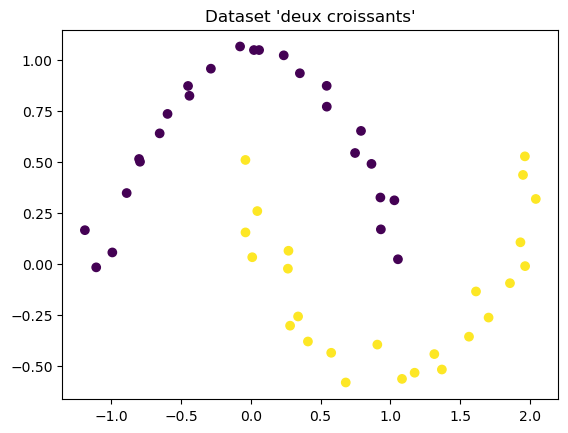

In [18]:
X, y = make_moons(n_samples=50, noise=0.07, random_state=14)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset 'deux croissants'")
plt.show()


## 2. Implémentation du perceptron sigmoïdal

On implémente l’apprentissage par descente de gradient.
À chaque epoch :
1) on calcule $( \hat{p} = \sigma(Xw + b) )$  
2) on met à jour $(w)$ et $(b)$ dans le sens qui réduit l’erreur de classification.


In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Je code le perceptron Sigmoid en une classe 

class PerceptronSigmoid:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        n, d = X.shape
        self.W = np.random.randn(d)
        self.b = 0
        self.accuracies = []
        self.history_W = []

        for _ in range(self.epochs):
            z = X @ self.W + self.b
            y_h = sigmoid(z)
            
            grad_w = X.T @ (y_h - y) / n
            grad_b = np.mean(y_h - y)

            self.W -= self.lr * grad_w
            self.b -= self.lr * grad_b

            y_pred = (y_h > 0.5).astype(int)
            acc = accuracy_score(y, y_pred)

            self.accuracies.append(acc)
            self.history_W.append((self.W.copy(), self.b))


## 3. Entraînement et visualisation de la frontière de décision

On entraîne le perceptron, puis on visualise la droite $(w_1 x_1 + w_2 x_2 + b = 0)$ à différents epochs
pour observer son évolution pendant l’apprentissage.


In [20]:
# Entraînement du perceptron sigmoïdal
model = PerceptronSigmoid(lr=0.1, epochs=100)
model.fit(X, y)


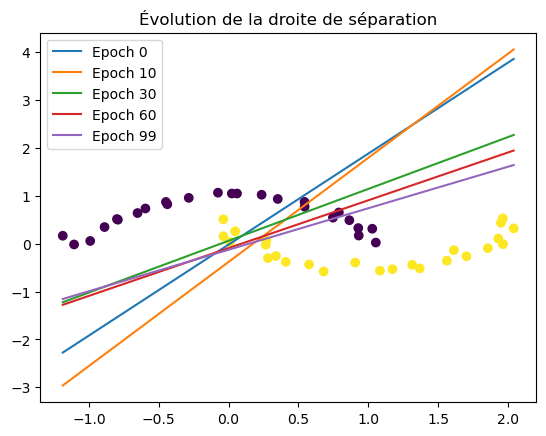

In [21]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)

# Choix d'epochs "représentatifs" pour voir le mouvement
for i in [0, 10, 30, 60, 99]:
    W, b = model.history_W[i]
    y_vals = -(W[0]*x_vals + b)/W[1]
    plt.plot(x_vals, y_vals, label=f"Epoch {i}")

plt.legend()
plt.title("Évolution de la droite de séparation")
plt.show()


## 4. Évolution de l'exactitude (accuracy)

On trace l'accuracy au fil des epochs. Comme les données ne sont pas séparables linéairement,
on s'attend à une progression initiale puis un plateau (compromis).


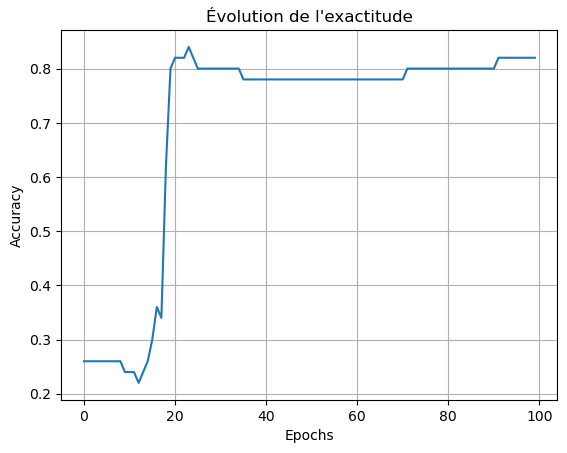

In [22]:
plt.figure()
plt.plot(model.accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Évolution de l'exactitude")
plt.grid(True)
plt.show()


## 5. Influence de l'initialisation des poids

On répète l'entraînement plusieurs fois avec des initialisations différentes.

Objectif : observer si le résultat final (accuracy) varie selon le point de départ.


In [23]:
results = []

# On relance l'entraînement plusieurs fois avec des initialisations aléatoires différentes
# Objectif : voir si la performance finale dépend fortement de l'initialisation

k = 15     # nombre d'expériences

for i in range(k):  
    model = PerceptronSigmoid(lr=0.1, epochs=100)
    model.fit(X, y)
    results.append(model.accuracies[-1])


In [ ]:
results

[0.74,
 0.84,
 0.86,
 0.82,
 0.82,
 0.76,
 0.82,
 0.82,
 0.7,
 0.82,
 0.72,
 0.82,
 0.86,
 0.86,
 0.82]

### Résumé des expériences

On résume les accuracies finales obtenues sur plusieurs initialisations.


In [25]:
print("Accuracy finale : moyenne =", np.mean(results))
print("Accuracy finale : écart-type =", np.std(results))
print("min =", np.min(results), "| max =", np.max(results))


Accuracy finale : moyenne = 0.8053333333333333
Accuracy finale : écart-type = 0.0492431608336517
min = 0.7 | max = 0.86


## Conclusion

- Le dataset *make_moons* n’étant pas linéairement séparable, une frontière **linéaire** (droite) ne peut pas séparer parfaitement les classes.
- Le perceptron sigmoïdal converge vers un **compromis** : l’accuracy augmente puis atteint un plateau.
- Les essais avec différentes initialisations donnent des résultats globalement proches, avec de légères variations (dépendance modérée à l’initialisation).


### Que se passe-t-il donc si un perceptron essaie de s’ajuster à des données non séparables linéairement ?

Le perceptron ne peut pas converger vers une solution parfaite. 

Il oscille autour d’une séparation imparfaite et l’erreur ne peut pas être annulée. L’exactitude reste donc limitée.